<a href="https://colab.research.google.com/github/valeriamedina2/Regresi-n-Lineal/blob/main/6_2_Espa%C3%B1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Girona_España**

In [ ]:
España = pd.read_csv('España_clean.csv')

In [ ]:
corr = []
det = []
Ta_V = []

## **Private room**

In [ ]:
PR_España = España.loc[España['room_type'] == "Private room"]
PR_España

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,bathrooms_text,bedrooms.1,amenities,calendar_updated.1,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,0,0,0,1,41.996500,2.836460,2,0,1,1,...,1 private bath,1,"[""Shared pool"", ""Refrigerator"", ""Long term sta...",--,t,31/03/23,08/10/10,27/02/23,HUTG-049542,f
1,1,1,1,1,41.793040,2.774120,2,0,1,1,...,1.5 shared baths,1,"[""Free parking on premises"", ""Refrigerator"", ""...",--,t,31/03/23,01/08/13,26/06/22,0,f
3,3,3,3,6,42.369580,2.980300,2,0,1,2,...,1 private bath,1,"[""Hair dryer"", ""Luggage dropoff allowed"", ""Fre...",--,t,31/03/23,23/08/13,29/08/22,PG000794,t
12,12,12,12,6,42.369580,2.980300,3,0,1,2,...,1 private bath,1,"[""Hair dryer"", ""Luggage dropoff allowed"", ""Was...",--,t,31/03/23,05/08/13,08/09/22,PG000794,t
13,13,13,13,6,42.369580,2.980300,3,0,1,2,...,1 private bath,1,"[""Hair dryer"", ""Dedicated workspace"", ""Luggage...",--,t,31/03/23,18/08/13,07/08/18,PG000794,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19534,19535,19535,19534,89,41.888870,3.179440,6,0,1,3,...,1 shared bath,1,"[""Pool"", ""Dining table"", ""Portable fans"", ""Fre...",--,t,01/04/23,--,--,KG-000059,t
19535,19536,19536,19535,89,41.888540,3.180800,4,0,1,2,...,1 shared bath,1,"[""Free parking on premises"", ""Mosquito net"", ""...",--,t,01/04/23,--,--,KG-000059,t
19546,19547,19547,19546,10,41.714360,2.822490,3,0,1,6,...,1 bath,1,"[""Air conditioning"", ""Refrigerator"", ""Host gre...",--,t,01/04/23,--,--,Exempt,t
19573,19574,19574,19573,77,41.793824,3.046657,5,0,2,5,...,1 bath,2,"[""Kitchen"", ""Washer"", ""Coffee maker"", ""Dishes ...",--,t,01/04/23,--,--,HUTG-016424,t


In [ ]:
España['price']

0         42.0
1         47.0
2         74.0
3         45.0
4        120.0
         ...  
19650    209.0
19651     52.0
19652     66.0
19653    108.0
19654     73.0
Name: price, Length: 19655, dtype: float64

### **host_acceptance_rate vs host_response_rate, Price, number_of_reviews , review_scores_rating**

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

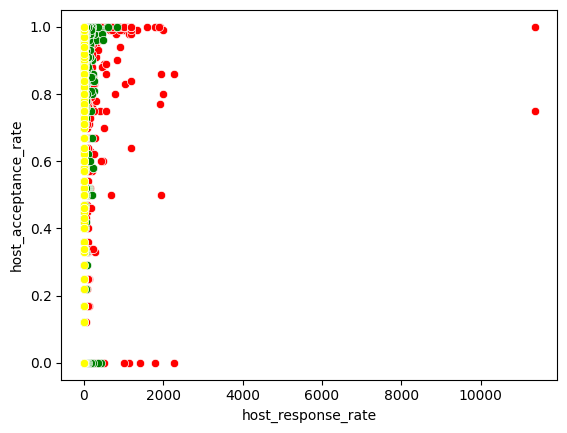

In [ ]:
from turtle import color


sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=PR_España)
sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=PR_España)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="green", data=PR_España)
sns.scatterplot(x='review_scores_rating', y='host_acceptance_rate', color="yellow", data=PR_España)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= PR_España[['host_response_rate', 'price', 'number_of_reviews' , 'review_scores_rating']]
Var_Dep= PR_España['host_acceptance_rate']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate', 'price', 'number_of_reviews',
        'review_scores_rating'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 4.54529095e-01,  1.89023757e-05, -3.01123980e-05, -4.77327592e-04]),
 'rank_': 4,
 'singular_': array([1.81596462e+04, 2.18549700e+03, 7.41025429e+01, 1.27162212e+01]),
 'intercept_': 0.46570832546687535}

**Modelo matemático: y= 4.54529095e-01x1 + 1.89023757e-05x2 + -3.01123980e-05x3 + -4.77327592e-04x4 + 0.46570832546687535**

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter1=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter1

0.29689016672983193

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl1=np.sqrt(coef_Deter1)
coef_Correl1

0.5448762857106482

In [ ]:
det.append(coef_Deter1)
corr.append(np.sqrt(coef_Correl1))
Ta_V.append("Private room / host_acceptance_rate vs host_response_rate, Price, number_of_reviews , review_scores_rating")

### **Price vs availability_365, host_response_rate, number_of_reviews, accommodates**

<Axes: xlabel='availability_365', ylabel='price'>

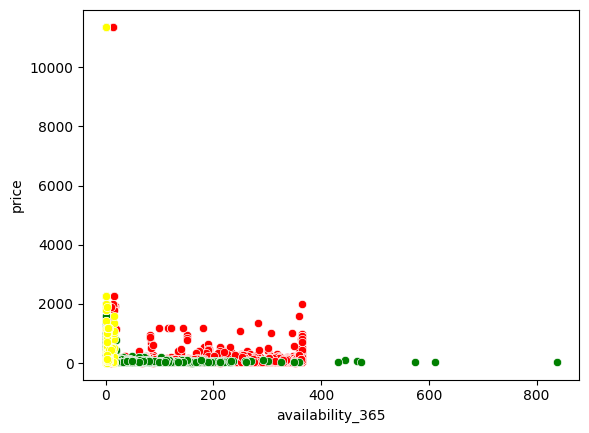

In [ ]:
from turtle import color

sns.scatterplot(x='availability_365', y='price', color="red", data=PR_España)
sns.scatterplot(x='host_response_rate', y='price', color="blue", data=PR_España)
sns.scatterplot(x='number_of_reviews', y='price', color="green", data=PR_España)
sns.scatterplot(x='accommodates', y='price', color="yellow", data=PR_España)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= PR_España[['availability_365', 'host_response_rate', 'number_of_reviews', 'accommodates']]
Var_Dep= PR_España['price']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365', 'host_response_rate', 'number_of_reviews',
        'accommodates'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ -0.47284482, -54.78280709,  -0.70173059,  12.64533458]),
 'rank_': 4,
 'singular_': array([4208.79584398, 2193.82432012,   63.63347811,   12.71144683]),
 'intercept_': 302.00943446953454}

**Modelo matemático: y= -0.47284482x1 + -54.78280709x2 + -0.70173059x3 + 12.64533458x4 + 302.00943446953454**

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter2=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter2

0.02302449413455443

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl2

0.15173824216246354

In [ ]:
det.append(coef_Deter2)
corr.append(np.sqrt(coef_Correl2))
Ta_V.append("Private room / Price vs availability_365, host_response_rate, number_of_reviews, accommodates")

### **host_acceptance_rate vs number_of_reviews,review_scores_cleanliness,review_scores_communication**

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

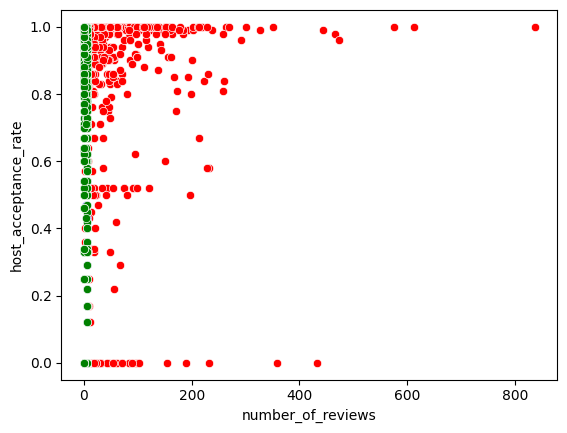

In [ ]:
from turtle import color

sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="red", data=PR_España)
sns.scatterplot(x='review_scores_cleanliness', y='host_acceptance_rate', color="blue", data=PR_España)
sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="green", data=PR_España)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= PR_España[['number_of_reviews','review_scores_cleanliness','review_scores_communication']]
Var_Dep= PR_España['host_acceptance_rate']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'review_scores_cleanliness',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 4.26131356e-05,  2.05418052e-02, -2.04353098e-02]),
 'rank_': 3,
 'singular_': array([2194.10245296,  107.87768598,    7.92399325]),
 'intercept_': 0.8323377197872113}

**Modelo matemático: y= 4.26131356e-05x1 + 2.05418052e-02x2 + -2.04353098e-02x3 + 0.8323377197872113**

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter3=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter3

0.0005325023933863138

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl3=np.sqrt(coef_Deter3)
coef_Correl3

0.023076013377234677

In [ ]:
det.append(coef_Deter3)
corr.append(np.sqrt(coef_Correl3))
Ta_V.append("Private room / host_acceptance_rate vs number_of_reviews,review_scores_cleanliness,review_scores_communication")

## **Hotel room**

In [ ]:
HR_España = España.loc[España['room_type'] == "Hotel room"]
HR_España

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,bathrooms_text,bedrooms.1,amenities,calendar_updated.1,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
1223,1223,1223,1223,112,41.881850,3.176840,4,0,2,3,...,1 bath,2,"[""Kitchen"", ""Iron"", ""Oven"", ""Shared pool"", ""Wa...",--,t,31/03/23,04/07/15,14/09/22,HUTG-008970,t
1390,1391,1391,1390,1,41.968180,3.229910,8,0,4,6,...,1 shared bath,4,"[""Exercise equipment: elliptical, free weights...",--,t,31/03/23,04/09/16,27/08/22,HUTG-015726,f
1616,1617,1617,1616,112,41.968670,3.210190,3,0,1,1,...,1 bath,1,"[""Kitchen"", ""Iron"", ""Washer"", ""Free parking on...",--,t,01/04/23,16/06/16,26/06/22,HUTG-001617,t
1829,1830,1830,1829,112,41.952240,3.204620,5,0,3,4,...,1 bath,3,"[""Kitchen"", ""Iron"", ""Washer"", ""Free parking on...",--,t,01/04/23,07/07/16,10/10/22,HUTG-014029,t
2061,2062,2062,2061,112,41.952000,3.205200,4,0,2,3,...,2 baths,2,"[""Kitchen"", ""Iron"", ""Free street parking"", ""Wa...",--,t,01/04/23,26/06/16,20/05/22,HUTG-001207,t
2063,2064,2064,2063,112,41.954880,3.226840,4,0,2,3,...,1 bath,2,"[""Shared pool"", ""Free parking on premises"", ""R...",--,t,01/04/23,08/07/17,30/07/22,HUTG-010465,t
2335,2336,2336,2335,5,41.956940,3.036120,2,0,1,1,...,1 private bath,1,"[""Beach essentials"", ""Board games"", ""Carbon mo...",--,t,01/04/23,20/08/16,01/01/23,HUTG-029339,t
3422,3423,3423,3422,112,41.923860,3.206770,4,0,2,3,...,1 bath,2,"[""Shared pool"", ""Free parking on premises"", ""R...",--,t,01/04/23,06/07/17,13/06/21,HUTG-035087,t
3468,3469,3469,3468,112,41.968110,3.208150,4,0,2,2,...,1.5 baths,2,"[""Kitchen"", ""Iron"", ""Washer"", ""Free parking on...",--,t,01/04/23,11/06/17,10/09/22,HUTG-009072,t
3837,3838,3838,3837,112,41.892060,3.184600,6,0,3,4,...,1 bath,3,"[""Shared pool"", ""Free parking on premises"", ""R...",--,t,01/04/23,19/09/20,06/05/22,HUTG-022410,t


### **host_acceptance_rate vs host_response_rate, Price, number_of_reviews , review_scores_rating**

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

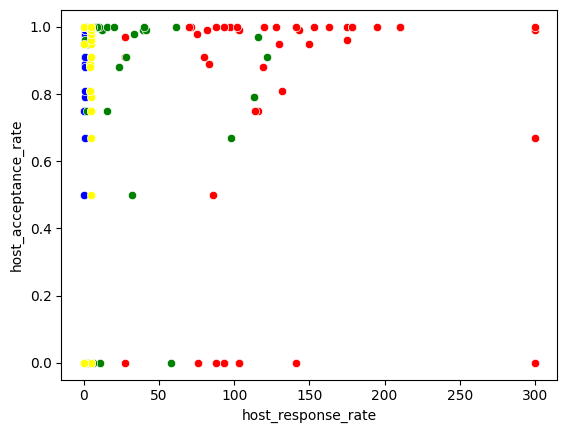

In [ ]:
from turtle import color


sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=HR_España)
sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=HR_España)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="green", data=HR_España)
sns.scatterplot(x='review_scores_rating', y='host_acceptance_rate', color="yellow", data=HR_España)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= HR_España[['host_response_rate', 'price', 'number_of_reviews' , 'review_scores_rating']]
Var_Dep= HR_España['host_acceptance_rate']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate', 'price', 'number_of_reviews',
        'review_scores_rating'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 6.38212147e-01, -1.58272456e-04, -1.98060852e-03,  4.99597165e-02]),
 'rank_': 4,
 'singular_': array([480.22476018, 221.57438043,  13.54854044,   3.13029412]),
 'intercept_': 0.20886576137025104}

**Modelo matemático: y= 6.38212147e-01x1 + -1.58272456e-04x2 + -1.98060852e-03x3 + 4.99597165e-02x4 + 0.20886576137025104**

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter4=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter4

0.6361552457448966

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl4=np.sqrt(coef_Deter4)
coef_Correl4

0.7975934087897771

In [ ]:
det.append(coef_Deter4)
corr.append(np.sqrt(coef_Correl4))
Ta_V.append("Hotel room / host_acceptance_rate vs host_response_rate, Price, number_of_reviews , review_scores_rating")

### **Price vs availability_365, host_response_rate, number_of_reviews, accommodates**

<Axes: xlabel='availability_365', ylabel='price'>

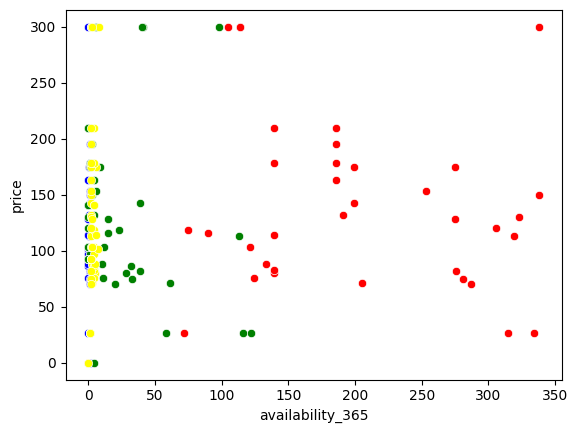

In [ ]:
from turtle import color

sns.scatterplot(x='availability_365', y='price', color="red", data=HR_España)
sns.scatterplot(x='host_response_rate', y='price', color="blue", data=HR_España)
sns.scatterplot(x='number_of_reviews', y='price', color="green", data=HR_España)
sns.scatterplot(x='accommodates', y='price', color="yellow", data=HR_España)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= HR_España[['availability_365', 'host_response_rate', 'number_of_reviews', 'accommodates']]
Var_Dep= HR_España['price']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365', 'host_response_rate', 'number_of_reviews',
        'accommodates'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 0.10033816, 25.11600715, -0.40161139, 12.03650053]),
 'rank_': 4,
 'singular_': array([829.71126569, 202.06547202,  10.98705401,   2.9008796 ]),
 'intercept_': 68.48315687449826}

**Modelo matemático: y= 0.10033816x1 + 25.11600715x2 + -0.40161139x3 + 12.03650053x4 + 68.48315687449826**

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter5=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter5

0.13844584522568193

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl5=np.sqrt(coef_Deter5)
coef_Correl5

0.3720831160180235

In [ ]:
det.append(coef_Deter5)
corr.append(np.sqrt(coef_Correl5))
Ta_V.append("Hotel room / Price vs availability_365, host_response_rate, number_of_reviews, accommodates")

### **host_acceptance_rate vs number_of_reviews,review_scores_cleanliness,review_scores_communication**

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

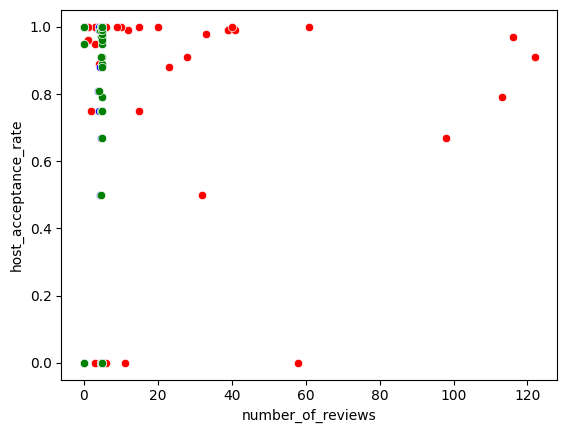

In [ ]:
from sklearn.metrics.pairwise import haversine_distances
from turtle import color

sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="red", data=HR_España)
sns.scatterplot(x='review_scores_cleanliness', y='host_acceptance_rate', color="blue", data=HR_España)
sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="green", data=HR_España)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= HR_España[['number_of_reviews','review_scores_cleanliness','review_scores_communication']]
Var_Dep= HR_España['host_acceptance_rate']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'review_scores_cleanliness',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([-0.00017812,  0.09018574, -0.01953892]),
 'rank_': 3,
 'singular_': array([222.96246389,  19.68869996,   1.21564639]),
 'intercept_': 0.49898194780112615}

**Modelo matemático: y= -0.00017812x1 + 0.09018574x2 + -0.01953892x3 + 0.49898194780112615**

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter6=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter6

0.13527806185297586

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl6=np.sqrt(coef_Deter6)
coef_Correl6

0.3678016610253084

In [ ]:
det.append(coef_Deter6)
corr.append(np.sqrt(coef_Correl6))
Ta_V.append("Hotel room / host_acceptance_rate vs number_of_reviews,review_scores_cleanliness,review_scores_communication")

## **Tabla**

In [ ]:
tabla = pd.DataFrame()
tabla['Tipo de habitación y Variables'] = Ta_V
tabla['Coef. Determinación'] = det
tabla['Coef. Correlación'] = corr
tabla

,Tipo de habitación y Variables,Coef. Determinación,Coef. Correlación
0,Private room / host_acceptance_rate vs host_re...,0.296890,0.738157
1,"Private room / Price vs availability_365, host...",0.023024,0.389536
2,Private room / host_acceptance_rate vs number_...,0.000533,0.151908
3,Hotel room / host_acceptance_rate vs host_resp...,0.636155,0.893081
4,"Hotel room / Price vs availability_365, host_r...",0.138446,0.609986
5,Hotel room / host_acceptance_rate vs number_of...,0.135278,0.606467
